In [1]:
# Dependencies
import numpy as np
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [4]:
Base.classes.keys()

['measurement', 'station']

## D1: Determine the Summary Statistics for June

In [5]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
result_june_temp = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 6)

In [6]:
#  3. Convert the June temperatures to a list.
june_temp = []
for temp in result_june_temp:
    june_temp.append(temp[1])

In [7]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_temp_df = pd.DataFrame(june_temp, columns=['temp'])
june_temp_df.head()

,temp
0,78.0
1,76.0
2,78.0
3,76.0
4,77.0


In [8]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temp_df.describe()

,temp
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [9]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
result_dec_temp = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 12)

In [10]:
# 7. Convert the December temperatures to a list.
dec_temp = []
for temp in result_dec_temp:
    dec_temp.append(temp[1])

In [11]:
# 8. Create a DataFrame from the list of temperatures for the month ofdf_dec_temp = pd.DataFrame(dec_temp)
dec_temp_df = pd.DataFrame(dec_temp, columns=['temp'])
dec_temp_df.head()

,temp
0,76.0
1,74.0
2,74.0
3,64.0
4,64.0


In [12]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_temp_df.describe()

,temp
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


### EXTRA WORK

In [13]:
june_mo_temp_df = pd.DataFrame(result_june_temp, columns=['date','temperature'])

<AxesSubplot:xlabel='date'>

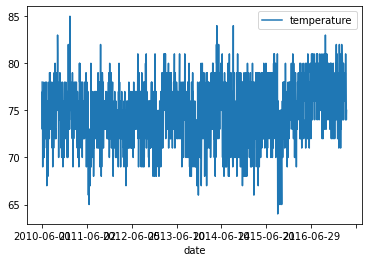

In [14]:
june_mo_temp_df.set_index(june_mo_temp_df['date'], inplace=True)

# Sort the dataframe by date
june_mo_temp_df = june_mo_temp_df.sort_index()
# Use Pandas Plotting with Matplotlib to plot the data
june_mo_temp_df.plot()

In [15]:
dec_mo_temp_df = pd.DataFrame(result_dec_temp, columns=['date','temperature'])

<AxesSubplot:xlabel='date'>

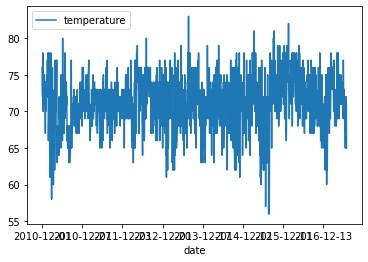

In [16]:
dec_mo_temp_df.set_index(dec_mo_temp_df['date'], inplace=True)

# Sort the dataframe by date
dec_mo_temp_df = dec_mo_temp_df.sort_index()
# Use Pandas Plotting with Matplotlib to plot the data
dec_mo_temp_df.plot()

In [17]:
# Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
result_june_prcp = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date) == 6)

In [18]:
june_prcp = []
for temp in result_june_prcp:
    june_prcp.append(temp[1])

In [19]:
#Data frame for June precipitation
june_prcp_df = pd.DataFrame(june_prcp, columns=['prcp'])
june_prcp_df

,prcp
0,0.00
1,0.01
2,0.00
3,0.00
4,0.00
...,...
1695,0.02
1696,0.10
1697,0.02
1698,0.04


In [20]:
june_prcp_df.describe()

,prcp
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


In [21]:
june_mo_prcp_df = pd.DataFrame(result_june_prcp, columns=['date','precipitation'])

In [22]:
june_mo_prcp_df

,date,precipitation
0,2010-06-01,0.00
1,2010-06-02,0.01
2,2010-06-03,0.00
3,2010-06-04,0.00
4,2010-06-05,0.00
...,...,...
1695,2017-06-26,0.02
1696,2017-06-27,0.10
1697,2017-06-28,0.02
1698,2017-06-29,0.04


<AxesSubplot:xlabel='date'>

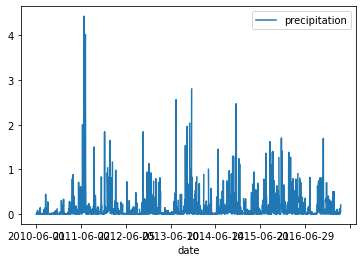

In [23]:
june_mo_prcp_df.set_index(june_mo_prcp_df['date'], inplace=True)

# Sort the dataframe by date
june_mo_prcp_df = june_mo_prcp_df.sort_index()
# Use Pandas Plotting with Matplotlib to plot the data
june_mo_prcp_df.plot()

In [24]:
# Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
result_dec_prcp = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date) == 12)

In [25]:
dec_mo_prcp_df = pd.DataFrame(result_dec_prcp, columns=['date','precipitation'])

In [26]:
dec_mo_prcp_df

,date,precipitation
0,2010-12-01,0.04
1,2010-12-03,0.00
2,2010-12-04,0.00
3,2010-12-06,0.00
4,2010-12-07,0.00
...,...,...
1512,2016-12-27,0.14
1513,2016-12-28,0.14
1514,2016-12-29,1.03
1515,2016-12-30,2.37


In [28]:
dec_mo_prcp_df.describe()

,precipitation
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


<AxesSubplot:xlabel='date'>

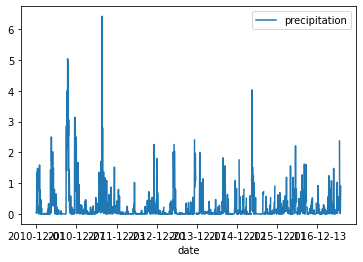

In [27]:
dec_mo_prcp_df.set_index(dec_mo_prcp_df['date'], inplace=True)

# Sort the dataframe by date
dec_mo_prcp_df = dec_mo_prcp_df.sort_index()
# Use Pandas Plotting with Matplotlib to plot the data
dec_mo_prcp_df.plot()